Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> El choque de civilizaciones de Samuel Huntington </h1>
    <p>
        Profesor Vicente Domínguez<br>
        Primer semestre 2022<br>    
        Fecha de entrega: Viernes 13 de mayo a las 22.00
    </p>
    <br>
</center>

<br>

---

# Indicaciones

Deberás entregar SOLO el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.


# Librerías

Librerías aceptadas:
- `Numpy`
- `Pandas`
- `Matplotlib`
- `Seaborn`

Clases y funciones aceptadas de la librería `sklearn`:
- `silhouette_score` del módulo `metrics`
- `pca` del módulo `decomposition` (solo para la parte 4!)

Librerías y funciones prohibidas:
- Cualquier otra función de `sklearn`
- *Cualquier otra librería que maneje y prediga datos* 

<br>

---

# Introducción

La teoría de civilizaciones de Samuel Huntington plantea como hipótesis que el mayor nivel de identificación cultural de una persona está dado por la civilización a la que pertenece. Citando el artículo de 1993 de Huntington:

> *Los Estados-nación seguirán siendo los actores más poderosos del panorama internacional, pero los principales conflictos de la política global ocurrirán entre naciones y grupos de naciones pertenecientes a diferentes civilizaciones. El choque de civilizaciones dominará la política global. Las fallas entre las civilizaciones serán los frentes de batalla del futuro.*

Si bien esta aglomeración de países en civilizaciones tiende al debate político, estudios como el de la universidad de [Stanford](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0122543) han observado que el comportamiento de individuos en el Internet (como por ejemplo, en el intercambio de correos electrónicos) exhibe tendencias que conforman las grandes agrupaciones correspondientes a las civilizaciones descritas por Huntington.

<br>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Civilizations_map.png/750px-Civilizations_map.png" width="400"/>

Fuente: https://es.wikipedia.org/wiki/Choque_de_civilizaciones

</center>

# ¿Cuál es tu tarea?

Como expert@ en minería de datos, se te encarga programar un algoritmo de *clustering* jerárquico aglomerativo que permita identificar una cantidad *n* de civilizaciones a partir cierta información de cada país del mundo.

# Descripción dataset

El *dataset* a utilizar proviene de [World Values Survey](https://www.worldvaluessurvey.org/wvs.jsp), una organización que desde los años 80 realiza encuentas valóricas en distintos países. En esta tarea, trabajaremos con los datos de 81 países recolectados entre 2017 y 2020. En total son 231 preguntas, cada una de ellas tiene distintas respuestas, cada una de las cuales representa a una de las 768 columnas del *dataset*. Por ejemplo, la pregunta `A001` es `Important in life: Family`, la cual es respondida entre los valores 1 y 4. Así, vemos que en Argentina cerca del 91% de las personas responden 1 a esa pregunda (ver `A001_1`), mientras que el 0% responde con 4. Los temas de las preguntas son variados, entre los que se encuentran las posiciones de las personas de cada país frente a, por ejemplo, el aborto, la importancia de la religión, el sentimiento de felicidad, la confianza en el gobierno y la valoración de la democracia. Puedes visitar la página web de WVS para obtener más información.

# Parte 1: Carga y preprocesamiento (0.5 ptos)


In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict

La base de datos se encuentra contenida en el archivo `countries.csv`, el cual pueden cargar directamente al notebook o mediante un link de Google Drive.

In [3]:
url='countries.csv'
# url='https://drive.google.com/uc?id=1_wiSDk4zy2dJf0ZzJaLslz3IVkruq_wZ'

df = pd.read_csv(url, index_col=0)

Realiza un preprocesamiento de los datos nulos y normaliza las columnas.

In [4]:
df.dropna()

,A001_1,A001_2,A001_3,A001_4,A002_1,A002_2,A002_3,A002_4,A003_1,A003_2,...,H010_1,H010_2,H010_3,H010_4,H011_1,H011_2,H011_3,H011_4,G027A_1,G027A_2
CNTRYCOW,,,,,,,,,,,,,,,,,,,,,
Albania,0.981092,0.017507,0.001401,0.000000,0.355944,0.562937,0.072028,0.009091,0.182517,0.635664,...,0.104167,0.203305,0.160201,0.532328,0.135908,0.204578,0.153791,0.505722,0.995816,0.004184
Andorra,0.895418,0.096614,0.004980,0.002988,0.548805,0.374502,0.068725,0.007968,0.629482,0.323705,...,0.036853,0.063745,0.173307,0.726096,0.041874,0.086740,0.127617,0.743769,0.276892,0.723108
Argentina,0.909272,0.089731,0.000997,0.000000,0.568295,0.339980,0.073779,0.017946,0.373373,0.469469,...,0.074035,0.188738,0.215850,0.521376,0.136698,0.227129,0.208202,0.427971,0.979063,0.020937
Armenia,0.898599,0.094730,0.004670,0.002001,0.395194,0.482644,0.110814,0.011348,0.272605,0.498995,...,0.156504,0.277100,0.275745,0.290650,0.195946,0.289189,0.247297,0.267568,0.963333,0.036667
Australia,0.907377,0.077094,0.013311,0.002219,0.566818,0.389015,0.041903,0.002265,0.426538,0.504556,...,0.075851,0.247630,0.367540,0.308979,0.104619,0.229827,0.303840,0.361714,0.928453,0.071547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,0.917978,0.073737,0.006214,0.002071,0.617330,0.349917,0.028607,0.004146,0.544813,0.381328,...,0.050693,0.127816,0.364385,0.457106,0.058442,0.136364,0.345022,0.460173,0.996687,0.003313
Ukraine,0.875346,0.112188,0.010042,0.002424,0.350731,0.545581,0.088727,0.014962,0.360224,0.480182,...,0.019378,0.094333,0.286654,0.599634,0.033151,0.135519,0.246630,0.584699,0.957138,0.042862
United States of America,0.893174,0.085229,0.018511,0.003085,0.482385,0.413086,0.096012,0.008517,0.390008,0.498064,...,0.045010,0.169863,0.355382,0.429746,0.073828,0.197656,0.319141,0.409375,0.894322,0.105678


In [5]:
df=(df-df.min())/(df.max()-df.min())
df.describe()

,A001_1,A001_2,A001_3,A001_4,A002_1,A002_2,A002_3,A002_4,A003_1,A003_2,...,H010_1,H010_2,H010_3,H010_4,H011_1,H011_2,H011_3,H011_4,G027A_1,G027A_2
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.701351,0.298656,0.186515,0.120560,0.625015,0.419465,0.175260,0.230934,0.512677,0.467803,...,0.192069,0.344647,0.454576,0.543962,0.225146,0.416763,0.399579,0.503120,0.907879,0.092121
std,0.179815,0.182161,0.175717,0.158744,0.216132,0.223668,0.181537,0.242748,0.220812,0.204788,...,0.212811,0.206996,0.183865,0.230245,0.202854,0.198405,0.188465,0.244185,0.146994,0.146994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.612815,0.180080,0.073519,0.000000,0.502232,0.275948,0.065525,0.059010,0.396258,0.312071,...,0.047273,0.195118,0.334902,0.377680,0.075805,0.286014,0.281869,0.361838,0.866889,0.005927
50%,0.718969,0.280106,0.137048,0.084522,0.664489,0.356689,0.123269,0.132594,0.520434,0.491306,...,0.118636,0.333575,0.454576,0.543962,0.158797,0.375846,0.396968,0.504498,0.964306,0.035694
75%,0.816554,0.409294,0.259223,0.159161,0.789954,0.569233,0.208657,0.350672,0.653773,0.613113,...,0.249802,0.429119,0.548132,0.730691,0.298728,0.527016,0.486330,0.681799,0.994073,0.133111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Parte 2: Clustering (4 ptos)

En esta parte deberás implementar el algoritmo de *clustering* jerárquico algomerativo visto en clases. Para esto deberás completar dos clases:

## Clase Civilization (Cluster)

Esta clase representa un *cluster* de paises. Cada instancia posee un identificador único `id` y un conjunto de paises `countries` que pertenecen a dicha civilización. Cada *cluster* se crea a partir de la unión de otros dos. La excepción a esta regla es al inicializar la clase `AgglomerativeClustering`, donde se crea un `cluster` por cada país.

In [7]:
class Civilization:

  def __init__(self, id, sub1=None, sub2=None, country=None, original = None) -> None:
    # Completa esta clase
    
    self.id = id #id civilization
    self.countries = list() # lista de paises del cluster
    self.vector = None # vector del cluster, para el metodo de centroid

    # Los paises de un cluster se crean a partir de los paises de los padres.
    # O a partir de un pais inicial.

    if country:

      self.vector = np.array(original) # vector del pais, para el metodo de centroid
      self.countries.append(country)  # agrega el pais inicial al cluster
      # Completa aqui

    else:

      self.countries = sub1.countries + sub2.countries   # Lista de paises del cluster
      self.vector = (np.add(sub1.vector* len(sub1.countries), sub2.vector* len(sub2.countries)))/ len(self.countries) # Nuevo vector, para el metodo de centroid
      # Completa aqui
  def __str__ (self) -> str:

    countries = f"cluster {self.id}:\n"
    for i in range(len(self.countries)):
      countries += f"-{i}: {self.countries[i]}\n"
    return countries

## Clase AgglomerativeClustering

Esta clase debe implemetar el algoritmo de clustering jerárquico aglomerativo. Para esto **debes** programar los siguientes métodos:


### A) __init__
Inicializa el algoritmo a partir de: la matriz `X` de características, el criterio de enlace `linkage` y la métrica de distancia `distance` a utilizar. Considera además todas las variables que necesites a lo largo de la ejecución de tu algoritmo, se recomienda como mínimo:
*   Un contador que indique el nivel actual de aglomeración.
*   Un diccionario o lista que almacene los clusters en cada nivel de aglomeración. Inicialmente, en el nivel 0, existe un *cluster* por cada país de `X`.
*   La matriz de distancia entre los *clusters* donde el elemento `matriz[id1][id2]` corresponde a la distancia entre los clusters con identificadores `id1` e `id2` respectivamente. 
*   Una copia de la matriz original X.

### B) get_distance
Calcula la distancia entre dos vectores utilizando la métrica definida en `distance`. Este método debe soportar dos métricas distintas:
*   **Manhattan**
*   **Euclidean**


### C) clusterize
Ejecuta el método next_level hasta que solo existan dos *clusters*.

### D) next_level
Equivale a realizar un nivel de aglomeración del algoritmo. A modo general deben:
1.   Obtener el par de *clusters* con menor distancia a partir de la matriz de distancias.
2.   Unir ambos *clusters*.
3.   Guardar el nuevo conjunto de *clusters* correspondientes al nivel actual de aglomeración.
4.   Actualizar la matriz de distancias según el nuevo conjunto de *clusters*.

### E) update_matrix
Actualiza la matriz de distancias dado un nuevo *cluster*. La distancia entre *clusters* debe poder calcularse según los siguientes enlaces (`linkage`) vistos en clases:
1.   **centroid**: distancia entre medias.
2.   **complete**: enlace completo.

<br>

---

**NOTA**: puedes entregarle los argumentos que quieras a estos métodos y tambien crear otros métodos que consideres pertinentes.

In [8]:
class AgglomerativeClustering:

  def __init__(self, X, linkage="centroid", distance="Manhattan", n_clusters=2) -> None:
    # Vectores de cada pais.
    self.X = X.copy()
    # Linkage.
    self.linkage = linkage
    # Métrica de distancia.
    self.distance = distance
    self.number_of_cluster = n_clusters

    # # Matriz de distancias (obtén la matriz de distancias inicial)
    self.number_cluster = 1    # contador de los clusters
    self.cluster_dict = {}     # diccionario de los clusters
    self.countries_dict = {}   # diccionario de los paises
    
    for countrie in self.X.index:
      cluster = Civilization(self.number_cluster, country= countrie, original= self.X.loc[countrie])
      self.cluster_dict[self.number_cluster] = cluster                # generamos el diccionario que indicando el id del cluster tenemos la instancia del cluster
      self.countries_dict[countrie] = self.number_cluster                # generamos el diccionario que indicando el id del cluster tenemos la instancia del cluster
      self.number_cluster += 1                                        # numero de clusters
    

    lista = range(1,82,1)

    self.matrix = pd.DataFrame([[None]*len(X)]*len(X))                #SETEAMOS EL DATAFRAME INICIAL
    self.matrix['cluster'] = lista                                    #SETEAMOS LA NUEVA COLUMNA QUE SERA EL INDEX
    self.matrix = self.matrix.set_index('cluster')                    #SETEAMOS EL INDEX COMO EL ID DEL CLUSTER
    self.matrix.columns = lista                                       #SETEAMOS LAS COLUMNAS

    for cluster1 in self.matrix.keys():
      cluster_1 = self.cluster_dict[cluster1]
      for cluster2 in self.matrix.keys():

        if cluster1 != cluster2 and self.matrix[cluster1][cluster2] == None :         #OBTENEMOS LA DISTANCIA DE DOS CLUSTERS QUE NO SON EL MISMO
          self.matrix[cluster1][cluster2] = self.get_distance(self.X.loc[cluster_1.countries[0]], self.X.loc[self.cluster_dict[cluster2].countries[0]])
          self.matrix[cluster2][cluster1] = self.matrix[cluster1][cluster2]
    # Copia de la matriz de distancias original.
    self.original_matrix = self.matrix.copy() 



  def clusterize(self) -> None:
     #mientras la cantidad de clusters sea al que queremos llegar
    while(len(self.matrix.columns) > self.number_of_cluster):
      self.next_level()     


    cluster = 1   
    self.countrie_cluster = [] # lista de paises y su cluster
    
    for i in self.matrix.columns:
      for countrie in self.cluster_dict[i].countries:
        self.countrie_cluster.append([countrie, cluster]) #agregamos el pais y su cluster a la lista
      cluster += 1

    self.countrie_cluster = sorted( self.countrie_cluster, key=lambda x:x[0]) #ordenamos la lista de paises y su cluster
    self.label_shiloutte = [x[1] for x in self.countrie_cluster]              #obtenemos la del cluster de cada pais

  def next_level(self) -> None:
    # Obtén el par de clusters con menor distancia de la matriz de distancias.

    min_cluster = []
    min_dis = 1_000_000_000

    for cluster1 in self.matrix.keys():
      for cluster2 in self.matrix.keys():
        
        if cluster1 != cluster2 and min_dis > self.matrix[cluster1][cluster2]: #si la distancia es menor que la anterior
          min_cluster = [cluster1, cluster2]                        #guardamos el par de clusters
          min_dis = self.matrix[cluster1][cluster2]                 #guardamos la distancia
    

    # Crea un nuevo cluster a partir de los dos anteriores
    # El nuevo nivel tiene los clusters anteriores y la union de los dos clusters elegidos.

    cluster = Civilization(self.number_cluster, sub1 = self.cluster_dict[min_cluster[0]], sub2 = self.cluster_dict[min_cluster[1]]) # creamos nuevo cluster 
    self.cluster_dict[self.number_cluster] = cluster                # lo agregamos al diccionario
    self.number_cluster += 1                                        # actualizamos el id del siguiente cluster
    
  
    # Elimina los dos clusters elegidos de la matriz de distancias.
    for cluster_id in min_cluster:                             
      del self.matrix[cluster_id]                               
    self.matrix = self.matrix.drop(labels = min_cluster)
    
    # Actualiza la matriz de distancias ingresando el nuevo cluster.
    self.update_matrix(cluster)       

  
  def update_matrix(self, cluster) -> None:

    self.matrix.loc[cluster.id] = [None for _ in range(len(self.matrix))] #SETEAMOS LA NUEVA FILA
    self.matrix[cluster.id] = [None for _ in range(len(self.matrix))]     #SETEAMOS LA NUEVA COLUMNA

    if self.linkage == "centroid":

      for cluster_id in self.matrix.columns:
        cluster1 = self.cluster_dict[cluster_id]
        
        if cluster1.id != cluster.id : #obtenemos la distancia entre el nuevo cluster y con cada cluster de la matriz
            self.matrix.loc[cluster.id, cluster_id] = self.get_distance(cluster.vector, cluster1.vector)   
            self.matrix.loc[cluster_id, cluster.id] = self.matrix.loc[cluster.id, cluster_id]


    elif self.linkage == "complete":

      for cluster_id in self.matrix.columns:
        if cluster_id != cluster.id:
          for countrie1 in  self.cluster_dict[cluster_id].countries:

            #obtain the max value of a column in the matrix
            values = max([self.original_matrix[self.countries_dict[countrie1]][self.countries_dict[x]] for x in cluster.countries])               
            self.matrix.loc[cluster.id, cluster_id] = values 
            self.matrix.loc[cluster_id, cluster.id] = values 



  def get_distance(self, vector1, vector2) -> float:

    distance = 0

    if self.distance == "Manhattan": 
      distance = sum(abs(value1 - value2) for value1, value2 in zip(vector1, vector2))
    
    elif self.distance == "Euclidean":
      distance = sum((value1 - value2)**2 for value1, value2 in zip(vector1, vector2))
      distance = distance**0.5

    return distance



In [91]:
cluster = AgglomerativeClustering(df, "centroid", "Manhattan", n_clusters=5)
cluster.clusterize()


# Parte 3 (1 pto)

En esta parte deberás comparar distintas configuraciones de tu algoritmo de *clustering* y concluir cual de estas es la mejor.

Una forma de comparar *clusters* es a partir de su *silhouette score*. Este mide cuán similar es un objeto a su propio *cluster* (cohesión) en comparación con otros *clusters* (separación). Completa el siguiente código utilizando la función `silhouette_score` de `sklearn.metrics`.

NOTA: debes adaptar la estructura de clusters retornada por `AgglomerativeClustering` de tal forma que pueda ser utilizada como los `labels` que recibe `silhouette_score` ([documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [10]:
from sklearn.metrics import silhouette_score

def civilization_silhouette_score(X, clusters):
  # Formatea un level de clusters y calculan el silhoutte score.
  return silhouette_score(X, clusters.label_shiloutte)

Ahora realiza una busqueda de hiperparámetros para encontrar la configuración que retorne el mejor *silhouette_score*. Como mínimo debes probar todas las combinaciones posibles de los siguientes parámetros:

*   ***Linkage***: Centroid y Complete.
*   ***Distance***: Manhattan y Euclidean.
*   **Número de clusters**: 5, 6, 7, 8, 9 y 10.

In [18]:
# Búsqueda de hiperparámetros
Linkage = ['centroid', 'complete']
Distance = ['Manhattan', 'Euclidean']
Numbers = [5, 6, 7, 8, 9, 10]
general = []
for number in Numbers:
  partial = [number]
  for linkage in Linkage:
    for distance in Distance:

      cluster = AgglomerativeClustering(df, linkage, distance, n_clusters=number)
      cluster.clusterize()
      score = civilization_silhouette_score(df, cluster)
      partial.append(score)
  general.append(partial)

general = pd.DataFrame(general)
general.columns = ['clusters','centroid-Manhttan', 'centroid-Euclidean', 'complete-Manhttan', 'complete-Euclidean']
general

,clusters,centroid-Manhttan,centroid-Euclidean,complete-Manhttan,complete-Euclidean
0,5,0.030434,0.092277,0.095085,0.070083
1,6,-0.041174,0.072447,0.064220,0.098477
2,7,-0.051480,0.056570,0.061556,0.099956
3,8,-0.044085,0.023622,0.066988,0.099613
4,9,-0.049906,-0.047665,0.063401,0.070761
5,10,-0.056066,-0.056048,0.076597,0.081850


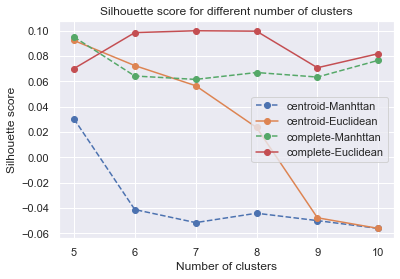

In [19]:
import matplotlib.pyplot as plt
X = general['clusters']
Y = general['centroid-Manhttan']
Y1 = general['centroid-Euclidean']
Y2 = general['complete-Manhttan']
Y3 = general['complete-Euclidean']
plt.plot(X, Y, marker='o', linestyle='--')
plt.plot(X, Y1, marker='o')
plt.plot(X, Y2, marker='o', linestyle='--')
plt.plot(X, Y3, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for different number of clusters')
plt.legend(['centroid-Manhttan', 'centroid-Euclidean', 'complete-Manhttan', 'complete-Euclidean'])
plt.show()

Hecho esto, responde las siguientes preguntas. Debes fundamentar todas tus respuestas con los resultados obtenidos en la búsqueda de hiperparámetros.
1.   ¿Cuál configuración fue la mejor? 

la mejor configuracion fue con los hiperparametros:
- Complete
- 7 clusters
- Euclidian


2.   ¿Qué métrica de distancia da mejores resultados? (puedes comparar las métricas fijando los valores de *linkage* y el número de clusters.) 

Con el grafico, notamos que en el donde se tienen mismo metodo de enlace y numero de clusters, en la mayoria de los casos es mejor Euclidian. Pero aun asi, mientras mas clusters  tengamos en el metodo de centroid funciona bastante mal.


3.   ¿Qué relación observas entre el método de enlace y la métrica de distancia utilizada? **Justifica**.

con el grafico, podemos ver que el metodo de enlace centroid funciona mejor o igual con la distancia Euclideana. Mientras que por otro lado Con el metodo de Complete, generalmente funciona mejor la metrica Euclidean, a pesar de que en terminos generales se parecen bastantes.

# Parte 4 (0.5 ptos)

Finalmente, debes visualizar la mejor aglomeración encontrada en la Parte 3. El siguiente código reduce la matriz X a dos dimensiones. De esta forma puedes graficar los *clusters* encontrados utilizando dos ejes y el color o forma para identificar cada civilización.

In [13]:
# NO MODIFICAR ESTA CELDA
from sklearn.decomposition import PCA

def reduce_to_2D(X):
  pca = PCA(n_components=2)
  new_X = pca.fit_transform(X)
  return pd.DataFrame(new_X, index=X.index)

In [89]:
cluster = AgglomerativeClustering(df, 'complete', 'Euclidean', 7)
cluster.clusterize()

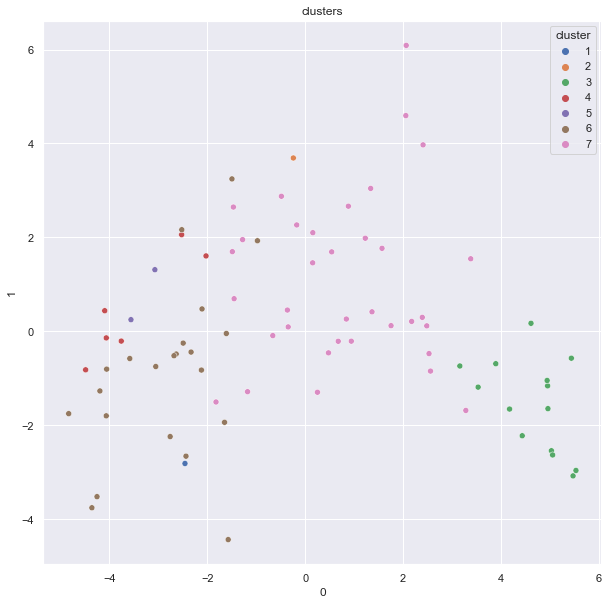

In [90]:
# Graficar los mejores clusters encontrados a partir de la matrix X reducida
import seaborn as sns
sns.set()
new = reduce_to_2D(df)
new['cluster'] = cluster.label_shiloutte
X_axis = new[0]
Y_axis = new[1]
plt.figure(figsize = (10,10))
sns.scatterplot(data=new, x=0, y=1, hue = 'cluster', palette = 'deep')
plt.title('clusters')
plt.show()

# Bonus

Esta tarea cuenta con una serie de bonus a los que podrás optar. Cabe recalcar que para optar a estos beneficios la nota de tu tarea (sin bonus) debe ser **igual o superior a 3,95** (sin considerar posibles descuentos).

## Dendrograma (2 décimas)

Los [dendrogramas](https://es.wikipedia.org/wiki/Dendrograma) son una forma muy útil de visualizar el funcionamiento de los algoritmos de *clustering* aglomerativo. Para completar este bonus debes generar un dendrograma a partir de tu mejor configuración de `AgglomerativeClustering`. Para esto debes utilizar la función `dendrogram` del módulo `cluster.hierarchy` de scipy.

<br>
<center>
<img src="https://docs.scipy.org/doc/scipy/_images/scipy-cluster-hierarchy-dendrogram-1_00.png" width="400"/>

Fuente: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

</center>

NOTA: Debes investigar que formato tiene la matriz `Z` (*linkage matrix*) que recibe `dendrogram` y adaptar el output de tu algoritmo acordemente. Está estrictamente prohibido obtener `Z` a partir de la función `linkage` del módulo `cluster.hierarchy`. Puedes modificar la clase `AgglomerativeClustering` si lo consideras necesario.

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Grafica el dendograma aqxuí
